As one of the identified models for our baseline comparison, Random Forrest was selected due to its its effectiveness in handling large datasets with higher dimensionality. It's known for its robustness against overfitting, importance in feature selection, and good generalization capabilities.

RF Models have been used in the types of data we are exploring, _______ ***something about how this one will differ***

I will run a baseline model for comparison. In order to enhance the typical approach of using random forest, I will incorporate unsupervised ML techniques to add to the feature space, and hopefully enhance the performance of the model

In [1]:
# Some may be redundant for certain. 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score



In [5]:
data = pd.read_csv('./Data/model_data.csv')
holder = data.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686195 entries, 0 to 686194
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  686195 non-null  int64  
 1   loanAmnt            686195 non-null  float64
 2   term                686195 non-null  int64  
 3   interestRate        686195 non-null  float64
 4   installment         686195 non-null  float64
 5   employmentTitle     686195 non-null  float64
 6   employmentLength    686195 non-null  float64
 7   homeOwnership       686195 non-null  int64  
 8   annualIncome        686195 non-null  float64
 9   verificationStatus  686195 non-null  int64  
 10  issueDate           686195 non-null  object 
 11  isDefault           686195 non-null  int64  
 12  purpose             686195 non-null  int64  
 13  postCode            686195 non-null  float64
 14  regionCode          686195 non-null  int64  
 15  dti                 686195 non-nul

In [19]:
# Rename earliestcreditlilne

data.rename(columns={"earliesCreditLine": "earliest_creditline"},inplace=True)

In [20]:
data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'issueDate', 'isDefault', 'purpose', 'postCode',
       'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliest_creditline', 'title', 'policyCode', 'endDate', 'avg_GDP',
       'avg_UNRATE', 'avg_CPIAUCSL', 'num_subGrade', 'num_grade'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686195 entries, 0 to 686194
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  686195 non-null  int64  
 1   loanAmnt            686195 non-null  float64
 2   term                686195 non-null  int64  
 3   interestRate        686195 non-null  float64
 4   installment         686195 non-null  float64
 5   employmentTitle     686195 non-null  float64
 6   employmentLength    686195 non-null  float64
 7   homeOwnership       686195 non-null  int64  
 8   annualIncome        686195 non-null  float64
 9   verificationStatus  686195 non-null  int64  
 10  issueDate           686195 non-null  object 
 11  isDefault           686195 non-null  int64  
 12  purpose             686195 non-null  int64  
 13  postCode            686195 non-null  float64
 14  regionCode          686195 non-null  int64  
 15  dti                 686195 non-nul

In [21]:
# To datetime - for groupby/date exploration

data.issueDate = pd.to_datetime(data.issueDate) # 2014-07-01
data.endDate = pd.to_datetime(data.endDate) # 2020-10-01 
data.earliest_creditline = pd.to_datetime(data.earliest_creditline) # May-2006

In [28]:
data.verificationStatus.unique()

array([2, 1, 0])

In [27]:
from sklearn.cluster import KMeans

In [35]:
# Select features for clustering - excluding 'id', 'isDefault', and any non-numeric or irrelevant columns
# will also use in classifier

features_for_clustering = ['loanAmnt', 'term', 'interestRate', 'installment',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'purpose', 'postCode',
       'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'title', 'policyCode', 'avg_GDP',
       'avg_UNRATE', 'avg_CPIAUCSL', 'num_subGrade', 'num_grade']

### Normalize Data

Random Forest is not sensitive to scale, so traditionally, this would not be a part of the process. However, since I wanted to utilize knn, it requires normalization. To be able to compare the baseline model to the model with the clustering labels, the data had to be handled similarly

In [31]:
# Normalize features for KNN comparison

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features_for_clustering])

# Convert scaled features back to a DataFrame 
df_scaled = pd.DataFrame(df_scaled, columns=features_for_clustering)

In [32]:
df_scaled

,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,isDefault,...,totalAcc,initialListStatus,applicationType,title,policyCode,avg_GDP,avg_UNRATE,avg_CPIAUCSL,num_subGrade,num_grade
0,2.316170,1.743984,1.305425,1.795610,-0.659852,-1.142846,2.076259,0.452473,1.336247,2.032176,...,0.148608,-0.795916,-0.139578,-0.194561,0.0,-0.169185,-0.418754,-0.262287,-1.781555,-1.741691
1,-0.309941,1.743984,0.779169,-0.564278,-0.353188,0.540275,-0.905896,-0.055402,1.336247,-0.492083,...,0.148608,-0.795916,-0.139578,-0.194705,0.0,0.514435,0.498012,0.503899,-0.948356,-0.969507
2,-0.424120,-0.573400,-1.244736,-0.401355,-0.205066,1.101315,0.585182,0.565334,0.026390,-0.492083,...,0.231639,1.256414,-0.139578,-0.194127,0.0,-0.133868,-0.664923,-0.308239,1.399749,1.347044
3,-0.424120,-0.573400,-1.092891,-0.387306,-0.157441,0.259755,-0.905896,-0.549169,1.336247,-0.492083,...,2.224373,1.256414,-0.139578,-0.193261,0.0,0.933616,-0.198704,0.908041,1.475494,1.347044
4,-1.446020,-0.573400,-1.155293,-1.456070,1.097008,0.820795,-0.905896,-0.605600,-1.283467,-0.492083,...,-0.183514,-0.795916,-0.139578,-0.194705,0.0,-0.795361,0.116679,-0.859193,1.399749,1.347044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686190,1.174383,-0.573400,0.259152,1.576450,-0.636992,0.259755,0.585182,-0.083617,-1.283467,-0.492083,...,-0.847758,1.256414,-0.139578,-0.194705,0.0,0.583404,-1.240840,0.365422,-0.115158,-0.197324
686191,0.260952,-0.573400,-1.111612,0.325801,-0.377553,1.101315,-0.905896,0.297289,1.336247,-0.492083,...,1.394067,-0.795916,-0.139578,4.625016,0.0,-1.917937,2.008979,-1.471084,1.399749,1.347044
686192,-0.995014,-0.573400,0.017864,-0.926181,-0.637745,1.101315,0.585182,-0.182371,1.336247,2.032176,...,0.895884,1.256414,-0.139578,-0.194705,0.0,-0.035409,-0.760909,-0.204078,-0.190903,-0.197324
686193,0.512146,-0.573400,-1.315458,0.555012,-0.661503,1.101315,-0.905896,0.254966,1.336247,-0.492083,...,0.978914,1.256414,-0.139578,-0.194127,0.0,-0.518247,-0.248982,-0.648877,1.399749,1.347044


In [36]:
# KNN with 3 clusters (a safe metric)

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 3

# Applying K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(df_scaled)

# Optionally, add distances to cluster centroids as features
distances = kmeans.transform(df_scaled)
for i in range(n_clusters):
    data[f'cluster_{i}_distance'] = distances[:, i]

/Users/yaseenellison/anaconda3/envs/ds5110/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


At this stage, I wanted to verify if my feaure engineering via unsupervised learing would merit any improvement in model performance, so the most accurate number of clusters was not hyper-sgnificant. A k of 3 is a traditionaly safe selection.

In [37]:
data

,id,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,...,endDate,avg_GDP,avg_UNRATE,avg_CPIAUCSL,num_subGrade,num_grade,cluster,cluster_0_distance,cluster_1_distance,cluster_2_distance
0,0,35000.0,5,19.52,917.97,320.0,2.0,2,110000.0,2,...,2019-07-01,19510.161857,4.638095,244.072190,2.5,2,0,5.071048,7.101367,7.028476
1,2,12000.0,5,16.99,298.17,31698.0,8.0,0,74000.0,2,...,2020-10-01,19923.215667,5.152381,249.167714,3.6,3,0,2.953097,5.257184,4.089970
2,3,11000.0,3,7.26,340.96,46854.0,10.0,1,118000.0,1,...,2018-08-01,19531.501000,4.500000,243.766583,6.7,6,2,5.545272,3.575027,3.397198
3,5,11000.0,3,7.99,344.65,51727.0,7.0,0,39000.0,2,...,2020-04-01,20176.490615,4.761538,251.855462,6.8,6,1,7.110777,5.093785,6.285976
4,6,2050.0,3,7.69,63.95,180083.0,9.0,0,35000.0,0,...,2017-10-01,19131.816769,4.938462,240.102462,6.7,6,1,7.452579,4.198706,5.593774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686190,799995,25000.0,3,14.49,860.41,2659.0,7.0,1,72000.0,0,...,2019-07-01,19964.887692,4.176923,248.246769,4.7,4,1,4.222999,4.050892,4.349861
686191,799996,17000.0,3,7.90,531.94,29205.0,10.0,0,99000.0,2,...,2016-04-01,18453.539385,6.000000,236.033077,6.7,6,1,8.402773,7.288846,7.318190
686192,799997,6000.0,3,13.33,203.12,2582.0,10.0,1,65000.0,2,...,2018-10-01,19590.991231,4.446154,244.459308,4.6,4,2,5.064305,5.690174,4.094135
686193,799998,19200.0,3,6.92,592.14,151.0,10.0,0,96000.0,2,...,2018-02-01,19299.253583,4.733333,241.501167,6.7,6,1,6.085209,5.184622,5.280317


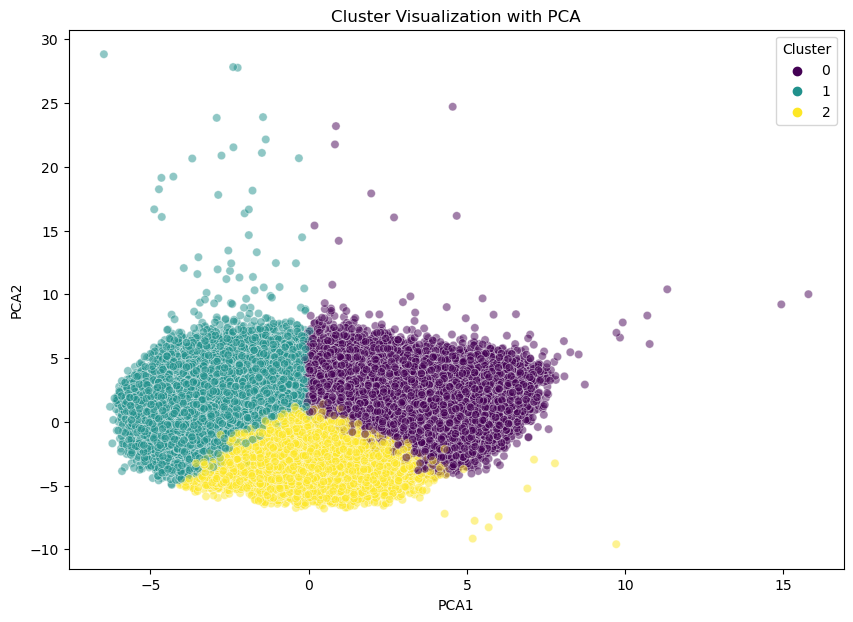

In [43]:
from sklearn.decomposition import PCA


# Reduce the data to 2 components for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = data['cluster']

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', alpha=0.5)
plt.title('Cluster Visualization with PCA')
plt.show()

Initially, I wanted to iterate through values of k, and optimize. since data is very large, we settle on simply assigning k = 3, a standard value. The intention behind adding the clusters is to see if using an unsupervised clustering method to generate additional features can improve model performance.

###  Random Forest Classification

In [44]:
# Split Data

X = data.drop('isDefault', axis=1)  # features including the new cluster labels
y = data['isDefault']  # target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Possibly Incorporate HyperParam tuning Into baseline Run
Using GridSearch to optimize.
Then incorporate optimal params in secondary run. 

In [46]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize the Random Forest Classifier for the baseline model
baseline_rfc = RandomForestClassifier(random_state=42)


# Select only the features that were used for clustering (basically dropping datetimes)
X_train_baseline = X_train[features_for_clustering] # all numeric features
X_test_baseline = X_test[features_for_clustering]


# Fit the baseline model on the training data without cluster labels
baseline_rfc.fit(X_train_baseline, y_train)


# Predict on test set 
y_baseline_pred = baseline_rfc.predict(X_test_baseline)


# Calculate accuracy and ROC-AUC for the baseline model
accuracy_baseline = accuracy_score(y_test, y_baseline_pred)
roc_auc_baseline = roc_auc_score(y_test, y_baseline_pred)


# Baseline Results
print(f"Baseline Model Accuracy: {accuracy_baseline}")
print(f"Baseline Model ROC-AUC: {roc_auc_baseline}")


Baseline Model Accuracy: 0.8077077215660271
Baseline Model ROC-AUC: 0.5339679170619377


In [47]:
# Init the Random Forest Classifier for the model with cluster labels
rfc_with_clusters = RandomForestClassifier(random_state=42)

# Include the cluster labels and any additional cluster-related features.
features_with_clusters = features_for_clustering + ['cluster',
                                                    'cluster_0_distance',
                                                    'cluster_1_distance', 
                                                    'cluster_2_distance']

# Fit model on the training data 
rfc_with_clusters.fit(X_train[features_with_clusters], y_train)


# Predict on test set 
y_pred_with_clusters = rfc_with_clusters.predict(X_test[features_with_clusters])


# Calculate accuracy and ROC-AUC 
accuracy_with_clusters = accuracy_score(y_test, y_pred_with_clusters)
roc_auc_with_clusters = roc_auc_score(y_test, y_pred_with_clusters)


# Evaluation results 
print(f"Model with Clusters Accuracy: {accuracy_with_clusters}")
print(f"Model with Clusters ROC-AUC: {roc_auc_with_clusters}")


Model with Clusters Accuracy: 0.850567258578101
Model with Clusters ROC-AUC: 0.6466430833823951


Although Acuracy in the Baseline Model is High, it can be misleading in the cases where a dataset is imbalanced. We know our true labels have a ~ 5:1 ratio, so here, AUC ROC is more robust in explaining model accuracy.

Accuracy: The model with clusters has an accuracy of approximately 85.06%, which is higher than the baseline model's accuracy of approximately 80.77%. This indicates that incorporating cluster-based features has improved the model's ability to correctly predict loan defaults.

ROC-AUC: The ROC-AUC score has increased to approximately 0.647 from the baseline model's 0.534. This is a substantial improvement and suggests that **the cluster-based features have provided meaningful information that helps distinguish between the default and non-default classes.** (A higher ROC-AUC score indicates a better model, with 1.0 representing a perfect model and 0.5 representing a model that performs no better than random guessing.)
    
Next Steps look like observing feature importance, refining my model via hyperparameter tuning, and cross-validating. As it stands, we are able to compare the Random Forest to the other chosen methods, and have also improved performance solely through additional feature engineering. 

In [50]:
len(holder[holder.isDefault != 0])

133768